In [1]:
import numpy as np
import numpy.linalg as la
import math 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

<function matplotlib.pyplot.show(close=None, block=None)>

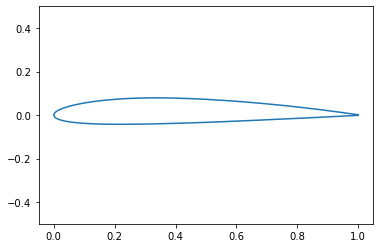

In [2]:
# #importing airfoil coordinates dataframe -- Omar
df_airfoil_0015 = pd.read_csv(r'/Users/Omar/Documents/GitHub/ae311_project2_group14/NACA2412_160.csv')
x_2412 = pd.DataFrame(df_airfoil_0015,columns= ['x-coordinates'])
y_2412 = pd.DataFrame(df_airfoil_0015,columns= ['y-coordinates'])
dfx = pd.DataFrame(x_2412)
dfy = pd.DataFrame(y_2412)
x_2412 = np.array(dfx.values.tolist()).flatten()
y_2412 = np.array(dfy.values.tolist()).flatten()

#plot airfoil coordinates
graph_2412 = plt.plot(x_2412,y_2412)
plt.ylim(-0.5,0.5)
plt.show

In [3]:
# # #importing airfoil coordinates dataframe -- Anna
# df_airfoil_2412 = pd.read_csv(r'/Users/annahylbert/Documents/GitHub/ae311_project2_group14/NACA2412_160.csv')
# x_2412 = pd.DataFrame(df_airfoil_2412,columns= ['x-coordinates'])
# y_2412 = pd.DataFrame(df_airfoil_2412,columns= ['y-coordinates'])
# dfx = pd.DataFrame(x_2412)
# dfy = pd.DataFrame(y_2412)
# x_2412 = np.array(dfx.values.tolist()).flatten()
# y_2412 = np.array(dfy.values.tolist()).flatten()

# #plot airfoil coordinates
# graph_2412 = plt.plot(x_2412,y_2412)
# plt.ylim(-0.5,0.5)
# plt.show

C:\Users\Omar\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[1][331]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %


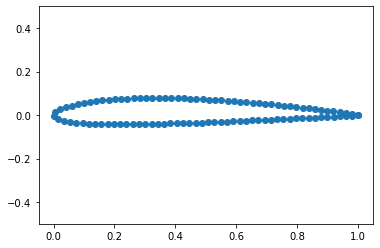

In [4]:
# m = number of points, x/y = coordinates of airfoil
# gets m+1 points to create m panels (#2)
def mOne(m, x, y):
    x = x.tolist()
    y = y.tolist()
    midpoints = [(x[j], y[j]) for j in range(len(x))] #don't think of these as actual midpoints, instead they are the ends points of all of the panels
    midpoints = np.array(midpoints)
    ticks, u = splprep(midpoints.T, u=None, s=0.0, per=1)
    u_new = np.linspace(u.min(), u.max(), m)
    xnew, ynew = splev(u_new, ticks, der=0)
    return xnew, ynew

mpoints = 100
xnew, ynew = mOne(mpoints, x_2412, y_2412)
newScatter = plt.scatter(xnew, ynew)
plt.ylim(-0.5,0.5)
plt.show()

(-0.5, 0.5)

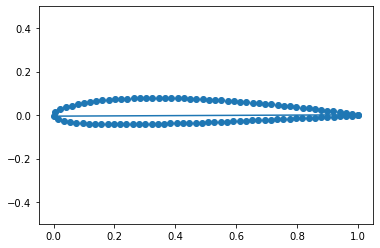

In [5]:
#creating chord line
leftx = np.amin(xnew)
rightx = np.amax(xnew)
leftinx = np.where(xnew == leftx)
rightinx = np.where(xnew == rightx)
lefty = ynew[leftinx]
righty = ynew[rightinx]
x = np.linspace(leftx, rightx, 100)
m = (righty - lefty)/(rightx - leftx)
bx = xnew[0]
by = ynew[0]
b = by - m*bx
y = m*x + b
plt.plot(x, y)
newScatter = plt.scatter(xnew, ynew)
plt.ylim(-0.5,0.5)


(51,)
(50,)


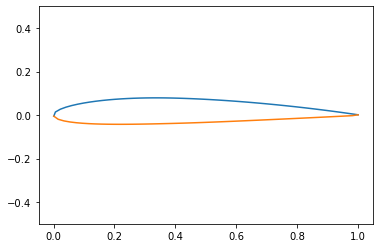

In [6]:
"""splitting pannels into top and bottom sections by seeing if each point
is lower or higher than chord line"""
upperx = []
uppery = []
lowerx = []
lowery = []

def truefalse(y, val):
    boole = True
    for i in y:
        if val <= i:
            boole = False
    return boole
    
for i in ynew:
    if truefalse(y, i) == True:
        uppery.append(i)
        upperx.append(xnew[np.where(ynew == i)])
    else:
        lowery.append(i)
        lowerx.append(xnew[np.where(ynew == i)])
    

lowerx = np.array(lowerx).flatten()
upperx = np.array(upperx).flatten()
lowery = np.array(lowery)
uppery = np.array(uppery)

firsty = lowery[0]
lowery = np.delete(lowery, 0, axis=None)
uppery = np.insert(uppery, 0, firsty, axis=None)

firstx = lowerx[0]
lowerx = np.delete(lowerx, 0, axis=None)
upperx = np.insert(upperx, 0, firstx, axis=None)

midy = lowery[0]
uppery = np.append(uppery, midy, axis=None)

midx = lowerx[0]
upperx = np.append(upperx, midx, axis=None)

plt.plot(upperx, uppery)
plt.plot(lowerx, lowery)
plt.ylim(-0.5,0.5)

print(upperx.shape)
print(lowerx.shape)

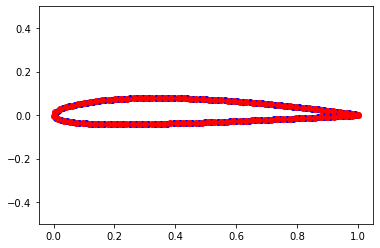

In [7]:
#finding midpoint of each panel(#2) based off of points created using mOne function
# x,y are the coordinates of points from mOne function
def midpoint_finder(x, y):
    x = x.tolist()
    y = y.tolist()
    tempMid = [(x[j], y[j]) for j in range(len(x))]
    midpoints = []
    mCount = 0
    
    for i in range(len(x)):
        midpoints.append(((tempMid[i][0] + tempMid[i+1][0])/2 , (tempMid[i][1] + tempMid[i+1][1])/2))
        mCount = mCount + 1
        if mCount == len(x)-1 or i+1 == len(x)-1:
            break                

    xval = [k[0] for k in midpoints]
    yval = [k[1] for k in midpoints]
    xval = np.array(xval)
    yval = np.array(yval)
    xval = xval.flatten()
    yval = yval.flatten()
    return xval, yval

#making sure it is working (plots look right!!!)
xnewM, ynewM = midpoint_finder(xnew, ynew)
    
newScatter = plt.scatter(xnewM, ynewM, color='blue')
oldScatter = plt.scatter(xnew, ynew, color='red')
plt.ylim(-0.5,0.5)
plt.show()

In [8]:
#3 function for finding theta i and theta j
#3 b matrix 
def thetas(dx, dy):
    dx = np.diff(dx)
    dy = np.diff(dy)
    dy = np.flip(dy, 0)
    dx = np.flip(dx, 0)
    return (np.arctan2(dy, dx) + np.pi)

def thetasUL(dxu, dyu, dxl, dyl):
    dxu = np.diff(dxu)
    dyu = np.diff(dyu)
    dxl = np.diff(dxl)
    dyl = np.diff(dyl)
    dyu = np.flip(dyu, 0)
    dxu = np.flip(dxu, 0)
    dyl = np.flip(dyl, 0)
    dxl = np.flip(dxl, 0)
    return (np.arctan2(dyl, dxl) + np.pi), (np.arctan2(dyu, dxu) + np.pi)
    
def bmatrix(thetas, alpha):
    bmat = []
    for i in thetas:
        bmat.append(np.sin(i - alpha))
    bmat.append(0.0)
    bmat = np.array(bmat)
    return bmat.T

thetas = thetas(xnew, ynew)* 180/np.pi
bmatrix = bmatrix(thetas, 20)

thetasL, thetasU = thetasUL(upperx, uppery, lowerx, lowery)
thetasL = thetasL * 180/np.pi
thetasU = thetasU * 180/np.pi

In [9]:
#define values needed to create A matrix

#endpoints of each panel
Xj = xnew 
Yj = ynew

#control/midpoints of each panel
xhatj = xnewM 
yhatj = ynewM


#array of all of the thetas
theta_j = thetas * np.pi/180

#length of each panel
delta_sj = np.sqrt(np.diff(Xj)**2 + np.diff(Yj)**2)


#using formulas from individual portion, creating matrices

Xj = np.delete(Xj, -1, axis=None)
Yj = np.delete(Yj, -1, axis=None)


# A = []
# B = []
# C = []
# D = []
# E = []
# F = []
# G = []
# P = []
# Q = []

# for i in range(len(Xj)):
#     A.append(-(xhatj[i]-Xj)*np.cos(theta_j) - (yhatj[i]-Yj)*np.sin(theta_j))
# A = np.array(A)

# for i in range(len(Xj)):
#     B.append((xhatj[i] - Xj)**2 + (yhatj[i] - Yj)**2)
# B = np.array(B)

# for i in range(len(Xj)):
#     C.append(np.sin(theta_j[i] - theta_j))
# C = np.array(C)

# for i in range(len(Xj)):
#     D.append(np.cos(theta_j[i] - theta_j))
# D = np.array(D)

# for i in range(len(Xj)):
#     E.append((xhatj[i] - Xj)*np.sin(theta_j) - (yhatj[i] - Yj)*np.cos(theta_j))
# E = np.array(E)

# dsjA = []
# for j in range(len(Xj)):
#     dsjA.append(delta_sj + 2*A[i, :])
# dsjA = np.array(dsjA)
# for i in range(len(Xj)):
#     F.append(np.log(1 + (delta_sj @ dsjA)@(la.inv(B))))
# F = np.array(F)

# for i in range(len(Xj)):
#     G.append(np.arctan(np.matmul(E, delta_sj)@la.inv(B + np.matmul(A, delta_sj))))
# G = np.array(G)

# for i in range(len(Xj)):
#     P.append((xhatj[i] - Xj)*np.sin(theta_j[i] - 2*theta_j) + (yhatj[i] - Yj)*np.cos(theta_j[i] - 2*theta_j))
# P = np.array(P)
    
# for i in range(len(Xj)):
#     Q.append((xhatj[i] - Xj)*np.cos(theta_j[i] - 2*theta_j) - (yhatj[i] - Yj)*np.sin(theta_j[i] - 2*theta_j))
# Q = np.array(Q)

# R = D + (1/(2*delta_sj))*np.matmul(Q, F) - np.matmul(np.matmul((np.matmul(A, C) + np.matmul(D, E)), G), (1/delta_sj))
# r = (1/2)*(np.matmul(D, F)) + np.matmul(C, G) - R

# Amat = []
# for i in range(len(Xj)):
#     Amatrow = []
#     for j in range(len(Xj)):
#         if j == 0:
#             Amatrow.append(r[i, j])
#         elif j == m - 2:
#             Amatrow.append(R[i, j])
#         else:
#             Amatrow.append(r[i, j] + R[i, j-1])
#     Amat.append(Amatrow)
    
# Amat = np.array(Amat)
# print(Xj.shape)

In [10]:
shapeCon = (int(mpoints-1), int(mpoints-1))
A = np.empty(shapeCon)
B = np.empty(shapeCon)
C = np.empty(shapeCon)
D = np.empty(shapeCon)
E = np.empty(shapeCon)
F = np.empty(shapeCon)
G = np.empty(shapeCon)
P = np.empty(shapeCon)
Q = np.empty(shapeCon)
R = np.empty(shapeCon)
r = np.empty(shapeCon)
for i in range(len(Xj)):
    for j in range(len(Xj)):
        A[i, j] = (-(xhatj[i]-Xj[j])*np.cos(theta_j[j]) - (yhatj[i]-Yj[j])*np.sin(theta_j[j]))
        B[i, j] = ((xhatj[i] - Xj[j])**2 + (yhatj[i] - Yj[j])**2)
        C[i, j] = (np.sin(theta_j[i] - theta_j[j]))
        D[i, j] = (np.cos(theta_j[i] - theta_j[j]))
        E[i, j] = ((xhatj[i] - Xj[j])*np.sin(theta_j[j]) - (yhatj[i] - Yj[j])*np.cos(theta_j[j]))
        F[i, j] = (np.log(1 + (delta_sj[j]*(delta_sj[j] + 2*A[i, j])) / B[i, j]))
        G[i, j] = (np.arctan(E[i, j]*delta_sj[j] / (B[i, j] + A[i, j]*delta_sj[j])))
        P[i, j] = ((xhatj[i] - Xj[j])*np.sin(theta_j[i] - 2*theta_j[j]) + (yhatj[i] - Yj[j])*np.cos(theta_j[i] - 2*theta_j[j]))
        Q[i, j] = ((xhatj[i] - Xj[j])*np.cos(theta_j[i] - 2*theta_j[j]) - (yhatj[i] - Yj[j])*np.sin(theta_j[i] - 2*theta_j[j]))
        R[i, j] = D[i, j] + (1/(2*delta_sj[j]))*Q[i, j]*F[i, j] - (A[i, j]*C[i, j] + D[i, j]*E[i, j])*G[i, j]*(1/(2*delta_sj[j]))
        r[i, j] = (1/2)*(D[i, j]*F[i, j]) + (C[i, j]*G[i, j]) - R[i, j]

Amat = []
for i in range(len(Xj)):
    Amatrow = []
    for j in range(len(Xj)):
        if j == 0:
            Amatrow.append(r[i, j])
        else:
            Amatrow.append(r[i, j] + R[i, j-1])
    Amat.append(Amatrow)
Amat = np.array(Amat)

lastCol = []
lastCol.append(R[:, -1])
lastCol = np.array(lastCol)

Amat = np.concatenate((Amat, lastCol.T), axis=1)


ones = np.zeros(Amat.shape[1]-2)    
ones = np.insert(ones, 0, 1)
ones = np.append(ones, 1)
ones = ones.reshape(1, Amat.shape[1])

Amat = np.concatenate((Amat, ones), axis=0)

gammas = la.solve(Amat, bmatrix)


[ 0.20534046  2.47316207  2.08546226  2.45728189  2.57893791  2.57908958
  2.51158658  2.40337968  2.27610781  2.13990072  2.00561372  1.88131672
  1.77095582  1.67796141  1.60483092  1.54987393  1.51241758  1.4917686
  1.48182718  1.47935008  1.4792722   1.47351479  1.46059959  1.43212209
  1.38406467  1.31521363  1.2226695   1.10670497  0.9702754   0.81289247
  0.65053733  0.49822109  0.34612247  0.19180392  0.0350172  -0.12331338
 -0.27795882 -0.41707045 -0.51883165 -0.5479199  -0.47937464 -0.35087195
 -0.3518422  -0.79785494 -1.52578918 -1.21292935 -2.08691999 -1.98381227
 -3.10882852  0.11498653 -1.72992074  1.40086908  0.59244185  0.74075407
 -0.26105276  0.47371237 -0.25079835 -0.5000175  -0.07525352  0.07021752
 -0.26416556 -0.65847017 -0.77170428 -0.61143563 -0.40148803 -0.34847171
 -0.51566759 -0.996439   -0.76397798 -0.95903837 -1.22413586 -1.46454734
 -1.66119567 -1.79824214 -1.87159928 -1.88845172 -1.85910701 -1.80022359
 -1.72748705 -1.65583007 -1.5965635  -1.5613138  -1.